In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split


In [2]:
civs_path = r'C:\Users\eshelton\Downloads\Yellow Front\Yellow Front'

In [3]:
path  = civs_path

paths = glob.glob(path + "/*.png") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths    = paths_subset[rand_idxs]

print(n_images)

151


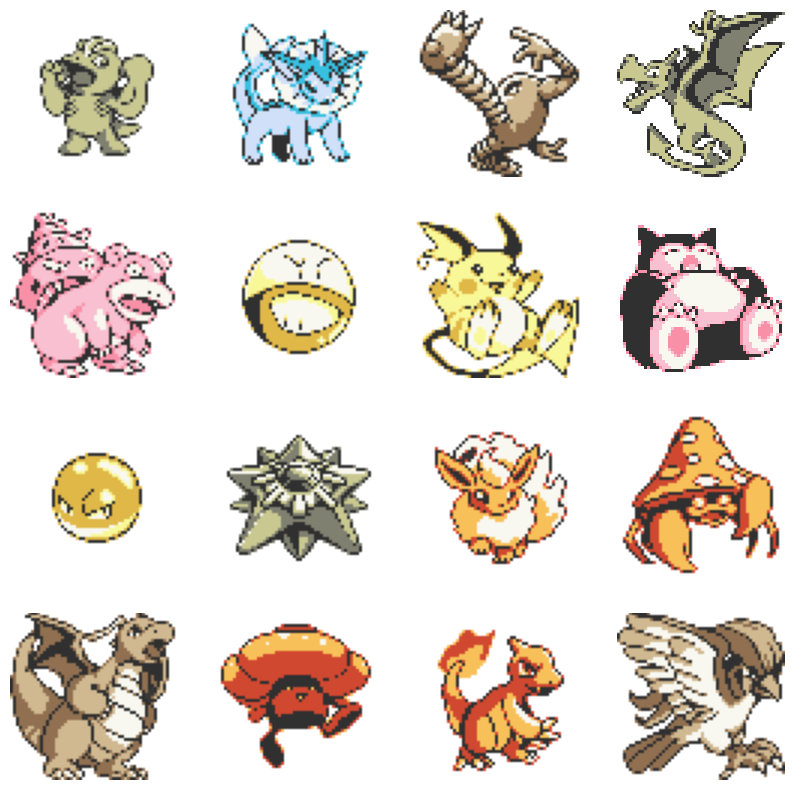

In [4]:
_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

In [27]:
def label_func2(fname):
    ## print(fname)
    fname = fname.replace(r"C:\Users\sheltoe\Downloads\Yellow Front\Yellow Front","")
    fname = fname.replace(".PNG", "")
    fname = fname.replace("\\", "")
    temp_name = fname.replace(".png", "").split("_")
    #print(temp_name)
    
  
    y0 = temp_name[0]                              ## pkmn
    #print(y0)
    y1 = float(temp_name[1].replace("hp", ""))     ## 'hp'
   
    y2 = float(temp_name[2].replace("atk", ""))    ## 'atk'
 
    y3 = float(temp_name[3].replace("def", ""))     ## 'def'
  
    y4 = float(temp_name[4].replace("spatk", ""))     ## 'spatk'
    #print(fname)
    ##y5 = float(temp_name[5].replace("Ph", ""))     ## 'Ph300'
    ##y6 = float(temp_name[6].replace("Ox", ""))    ## 'Ox24'
    ##y7 = float(temp_name[7].replace("Ow", ""))     ## 'Ow7
    ##y8 = float(temp_name[8].replace("Hbt", ""))    ## 'Hbt1459.8'
    ##y9 = float(temp_name[9].replace("Wm", ""))    ## 'Wm12.2'
    ##y10 = float(temp_name[10].replace("Wr", ""))    ## 'Wr308750.4'
    
 
    ## np.array([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10 ])
    return [fname, y0, y1, y2, y3, y4]

In [83]:
## 1400, 390
## x 0.2
## 280 , 78
## 140, 39   ## for web tool
## 1400, 390  * 0.4 = 560, 156


list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    #print(img_name)
    
    my_img = Image.open(img_name)
    
    my_img = my_img.resize((56, 56))

    my_img = ImageOps.grayscale(my_img)

    img_np = np.array(my_img)
    
    ## data = np.array(my_img)
    ## print(data)
    ## input()

    ## img_np = img_np.reshape(-1)
    
    temp_label_vector_rc = label_func2(img_name)
    print(temp_label_vector_rc[1])
    if temp_label_vector_rc[1] == "C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn":
    
        ##print(img_np.shape)
        list_imgs.append(img_np)

        list_label_vectors.append( temp_label_vector_rc )

print(list_imgs)
print(list_label_vectors)

C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Frontpkmn
C:UsersesheltonDownloadsYellow FrontYellow Fro

In [84]:
X =  list_imgs
y =  list_label_vectors 

print(X)
print(y)

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,  48,  48, 126],
       [255, 255, 255, ..., 126, 255, 

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

120
31
120
31


In [86]:
X_train[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 118],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [174]:
list_ids_train      = []
list_features_train = []
list_imgs_train     = []


for index in range(len(X_train)):
    
    # image target (label)
    reg_vals = y_train[index]
    target = np.zeros( (4) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]
    #target[ 4 ] = reg_vals[6]
    #target[ 5 ] = reg_vals[7]
    #target[ 6 ] = reg_vals[8]
    #target[ 7 ] = reg_vals[9]
    #target[ 8 ] = reg_vals[10]
    #target[ 9 ] = reg_vals[11]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_train[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
    

        
    list_ids_train.append(          reg_vals[0]                )
    list_imgs_train.append(        single_np_img               )
    list_features_train.append(    target      )

In [175]:
list_imgs_train[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 118],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [202]:
list_ids_test      = []
list_features_test = []
list_imgs_test     = []


for index in range(len(X_test)):
    
    # image target (label)
    reg_vals = y_test[index]
    target = np.zeros( (4) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]
    #target[ 4 ] = reg_vals[6]
    #target[ 5 ] = reg_vals[7]
    #target[ 6 ] = reg_vals[8]
    #target[ 7 ] = reg_vals[9]
    #target[ 8 ] = reg_vals[10]
    #target[ 9 ] = reg_vals[11]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_test[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
        
    list_ids_test.append(          reg_vals[0]                )
    list_imgs_test.append(        single_np_img               )
    list_features_test.append(    target      )

In [203]:
conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )

In [204]:
print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )

(120, 4)
(31, 4)


In [205]:
DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("PKMN_conditions_train.csv")

In [206]:
DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("PKMN_ids_train.csv")

In [207]:
list_imgs_train[17]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,  87, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [208]:
list_imgs_train[17].shape

(56, 56)

In [209]:
list_imgs_train_stretched = [     the_img_np.reshape(-1)         for the_img_np in list_imgs_train ]

In [210]:
list_imgs_train_stretched[0]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [211]:
list_imgs_train_stretched[4].shape

(3136,)

In [212]:
list_imgs_train_stretched[4][:1000]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [213]:
list_imgs_train_stretched[7].shape

(3136,)

In [214]:
np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )  

In [215]:
np_list_imgs_train_stretched.shape

(120, 3136)

In [216]:
np_list_imgs_train_stretched[3]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [217]:
DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)

In [218]:
DF_imgs_np_train

,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
0,255,255,255,255,118,48,48,48,48,48,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
116,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
117,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
118,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [219]:
DF_imgs_np_train.to_csv("PKMN_imgs_np_train.csv")

In [220]:
url1 = "PKMN_ids_train.csv"
pd_ids_train = pd.read_csv(url1)
pd_ids_train_np = pd_ids_train.to_numpy()
pd_ids_train_np = pd_ids_train_np[1:, 1:]

In [221]:
url2 = "PKMN_conditions_train.csv"
pd_conditions_train = pd.read_csv(url2)
pd_conditions_train_np = pd_conditions_train.to_numpy()
pd_conditions_train_np   = pd_conditions_train_np[1:, 1:]

In [222]:
url3 = "PKMN_imgs_np_train.csv"
pd_imgs_np_train = pd.read_csv(url3)
pd_imgs_np_train_np = pd_imgs_np_train.to_numpy()
pd_imgs_np_train_np      = pd_imgs_np_train_np[1:, 1:]

In [223]:
def euclidean_distance(v1, v2):
    return np.sqrt( np.sum(   (v1 - v2)**2   )   )

In [224]:
def predict(test_x):
    
    ## calculate distances between test_x and all dta samples in x
    ## this distances vector is a vector of 45 distances
    ## distances = [ euclidean_distance(test_x , x)  for x in X_train    ]

    distances = [ euclidean_distance(test_x, x )  for x in pd_conditions_train_np  ]
      
    
    ## distances - > [23, 3, 145, 17, ...]
    
    k = 3
    
    ## sort by distance value and return the k nearest neighbors
    ## np.argsort returns the indices of the k neares neighbors
    k_neighbor_indices = np.argsort(distances)[:k]
    print(k_neighbor_indices)
    
    
    ## with indices, extract labels from y_train 
    selected_imgs_to_avg = [ pd_imgs_np_train_np[i].reshape((56, 56))  for i in k_neighbor_indices  ]
    

    return selected_imgs_to_avg

In [225]:
np.set_printoptions(suppress=True)
print( conditions_matrix_test[:10, :] )


[[ 80.  82.  78.  95.]
 [ 20.  10.  55.  15.]
 [ 30.  40.  70.  70.]
 [ 70.  62.  67.  55.]
 [ 30.  80.  90.  55.]
 [ 60.  55.  50.  40.]
 [ 45.  49.  49.  65.]
 [ 55.  81.  60.  50.]
 [ 40.  45.  65. 100.]
 [ 65.  45.  55.  45.]]


In [226]:
def generate_img_per_index(index):
    
    selected_imgs_to_avg = predict( conditions_matrix_test[  index  ] )
    the_test_conditions = conditions_matrix_test[  index  ]
    
    
    avg_gen_img = np.mean( np.array(selected_imgs_to_avg), axis=0 )
    avg_gen_img = avg_gen_img.astype(int)
    gen_pil_image = avg_gen_img
    
    real_my_img = np.array(list_imgs_test[index])
    real_pil_image = Image.fromarray(real_my_img)
    real_pil_image = ImageOps.grayscale(real_pil_image)
    
    print(gen_pil_image)
    print(real_pil_image)
    
    return the_test_conditions, gen_pil_image, real_pil_image

[73  2 36]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
<PIL.Image.Image image mode=L size=56x56 at 0x1E0F8E28E90>


Text(0.5, 1.0, 'real')

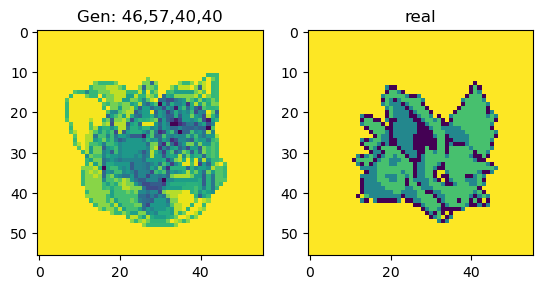

In [227]:
the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(17)


the_test_conditions = the_test_conditions.astype(int)
str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
str_conditions = str_conditions.replace(" ","")
str_conditions = str_conditions.replace("[","")
str_conditions = str_conditions.replace("]","")

## print(str_conditions)
                 

fig, ax = plt.subplots(1,2)

ax[0].imshow(gen_pil_image)
ax[1].imshow(real_pil_image)

ax[0].set_title("Gen: " + str_conditions)
ax[1].set_title("real")

[32 31 35]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 183 162 255]
 [255 255 255 ... 162 206 255]
 [255 255 255 ... 255 255 255]]
<PIL.Image.Image image mode=L size=56x56 at 0x1E0F86E1FD0>
[43  5 61]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
<PIL.Image.Image image mode=L size=56x56 at 0x1E0F66B1DD0>
[81 59 82]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
<PIL.Image.Image image mode=L size=56x56 at 0x1E0FA4D9990>
[74 66 21]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
<PIL.Image.

C:\Users\eshelton\AppData\Local\Temp\ipykernel_15728\451794440.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,2)


[18 92 50]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 186 186 199]
 [255 255 255 ... 199 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
<PIL.Image.Image image mode=L size=56x56 at 0x1E0F5AB9410>
[76 75 28]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
<PIL.Image.Image image mode=L size=56x56 at 0x1E0F8657ED0>
[27 57 73]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
<PIL.Image.Image image mode=L size=56x56 at 0x1E0F9F4FCD0>
[100  29 113]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
<PIL.Ima

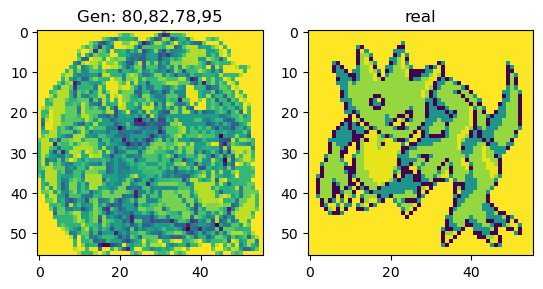

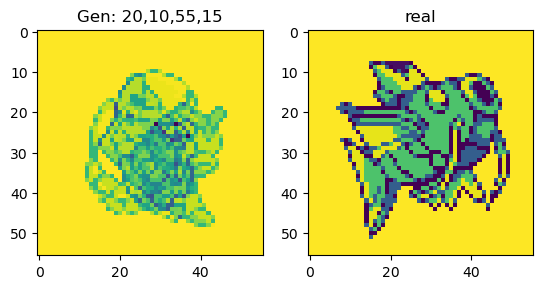

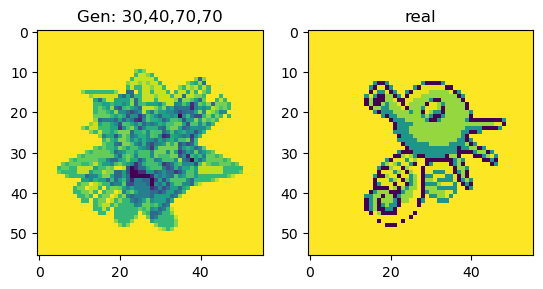

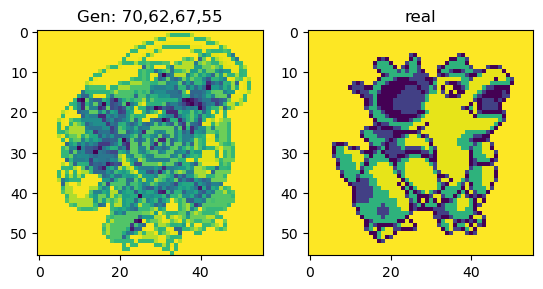

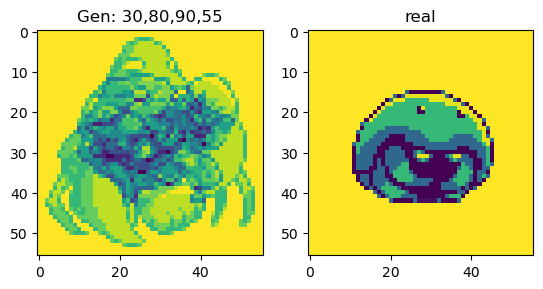

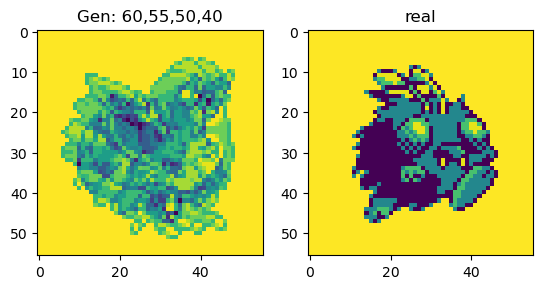

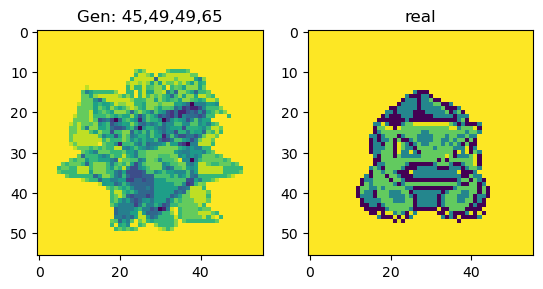

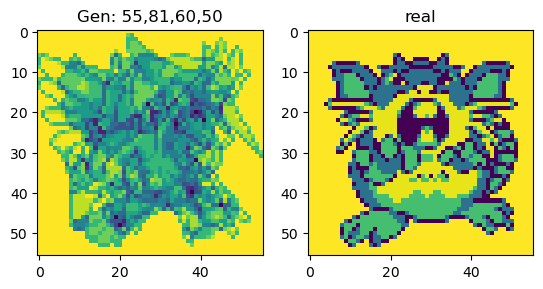

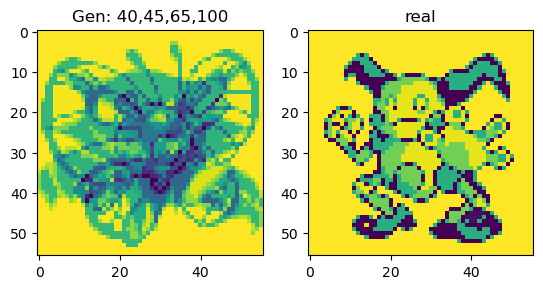

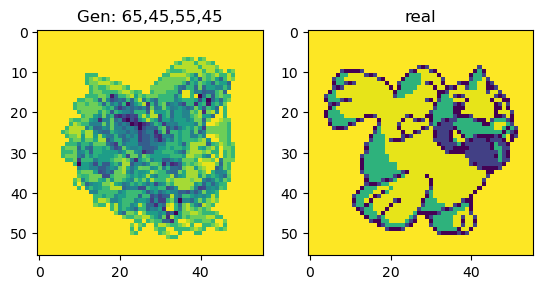

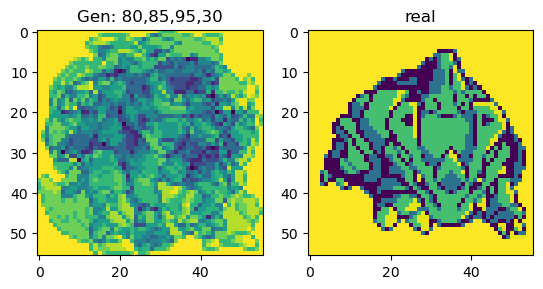

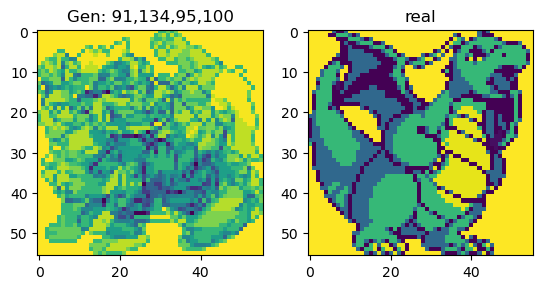

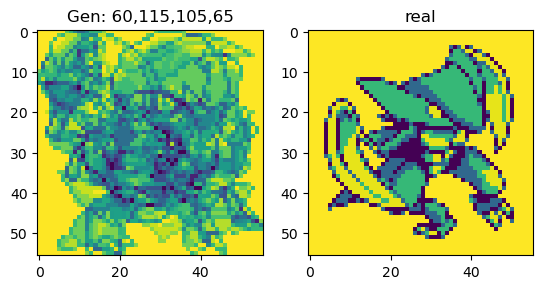

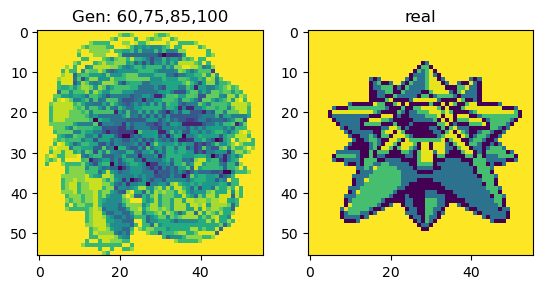

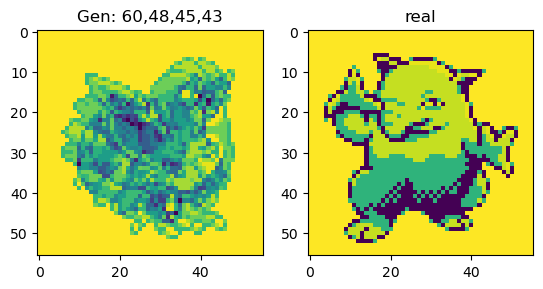

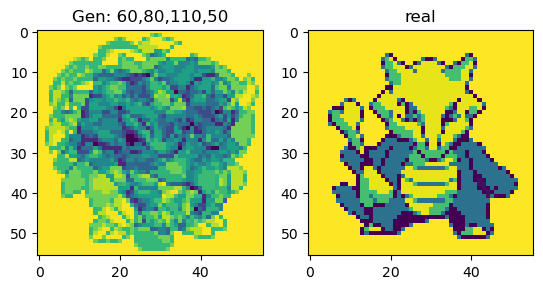

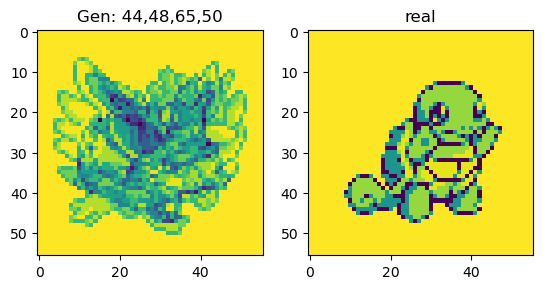

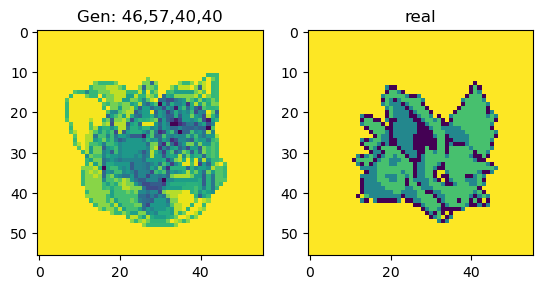

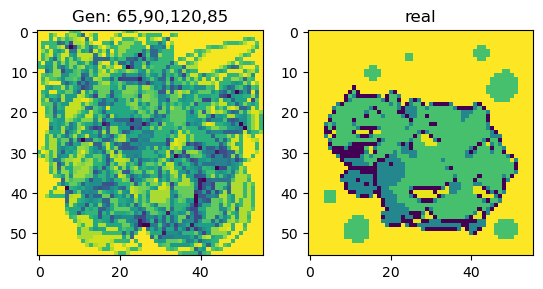

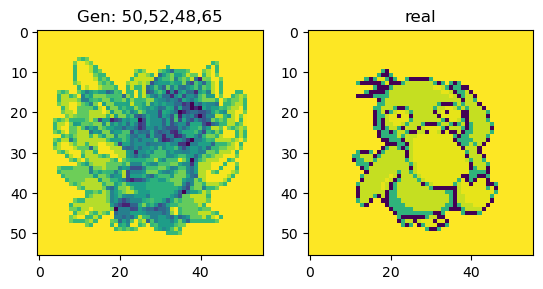

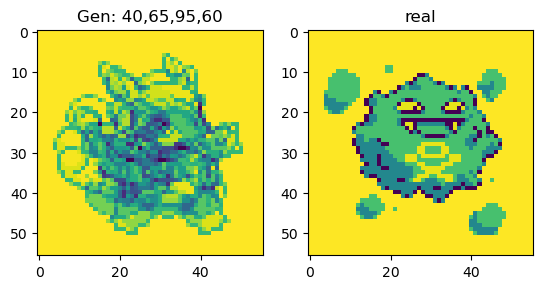

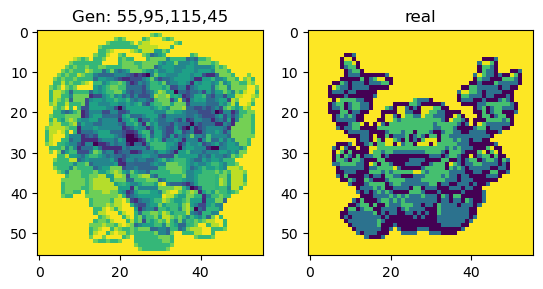

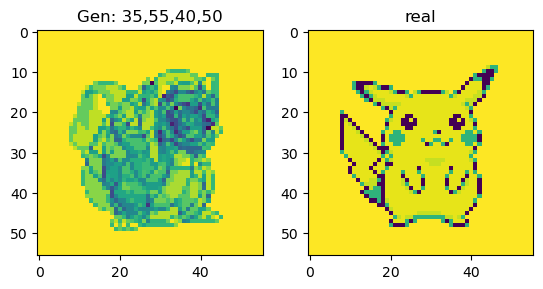

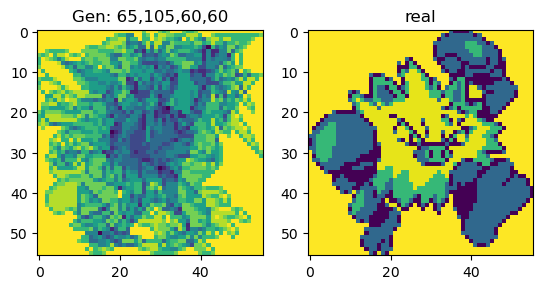

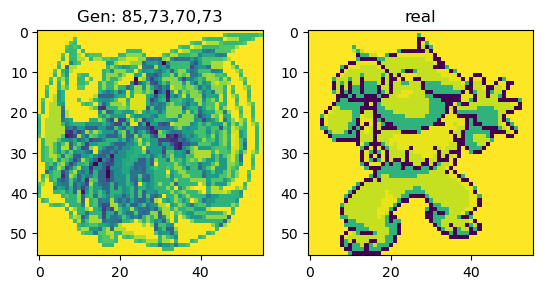

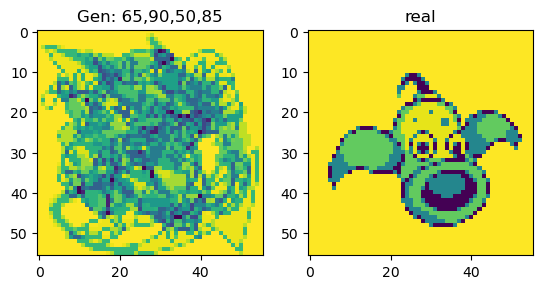

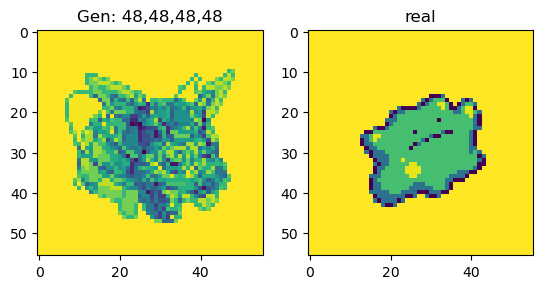

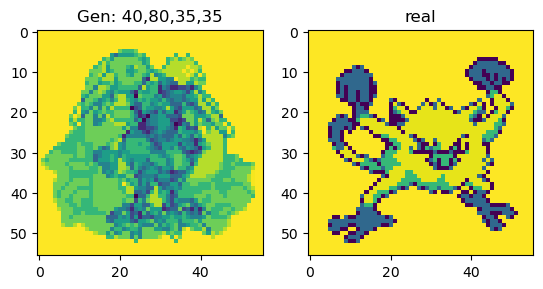

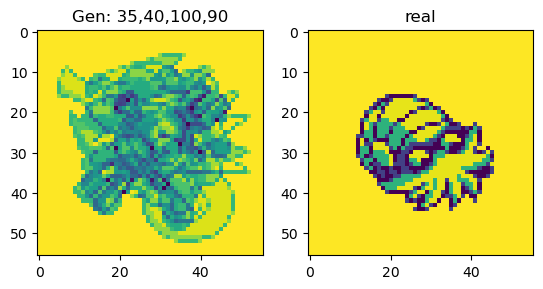

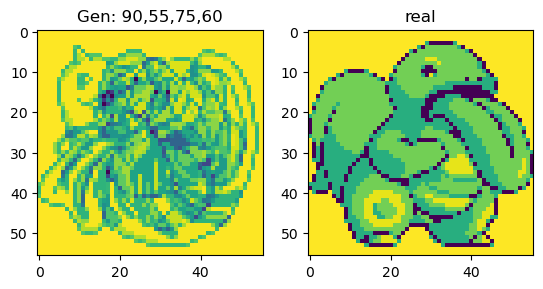

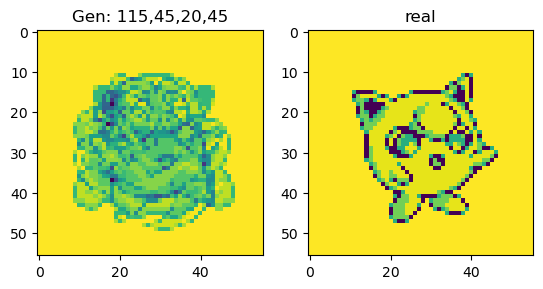

In [228]:
for test_i in range( conditions_matrix_test.shape[0]  ):


    the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(test_i)
    
    the_test_conditions = the_test_conditions.astype(int)
    str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
    str_conditions = str_conditions.replace(" ","")
    str_conditions = str_conditions.replace("[","")
    str_conditions = str_conditions.replace("]","")

    ## print(str_conditions)

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(gen_pil_image)
    ax[1].imshow(real_pil_image)
    
    ax[0].set_title("Gen: " + str_conditions)
    ax[1].set_title("real")